In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.dates as mdates
import datetime

%matplotlib notebook

Importacion de los datasets a utilizar, asi como de los datos especificos en cada uno de ellos

In [2]:
path = './Temperatura Promedio/' 
all_files = glob.glob(path + "/*.xlsx")
li = {}
i= 1985
for filename in all_files:
    df = pd.read_excel(filename, index_col=0, header=1 )
    li[pd.to_datetime(str(i))] = df['ANUAL']
    i= i+1
frame = pd.DataFrame(li).T

Seleccion de los estados a analizar, la fuente de donde se obtuvo que estos fueron los cinco estados con las mayores temperaturas registradas se encuentra a continuacion: https://contenido.com.mx/2018/06/los-10-estados-mas-ardientes-de-la-republica-mexicana/

In [3]:
top5 = ['VERACRUZ','QUINTANA ROO','NAYARIT','SAN LUIS POTOSÍ','TAMAULIPAS']

In [4]:
top5=frame[top5]

Creacion y configuracion del grafico

<IPython.core.display.Javascript object>


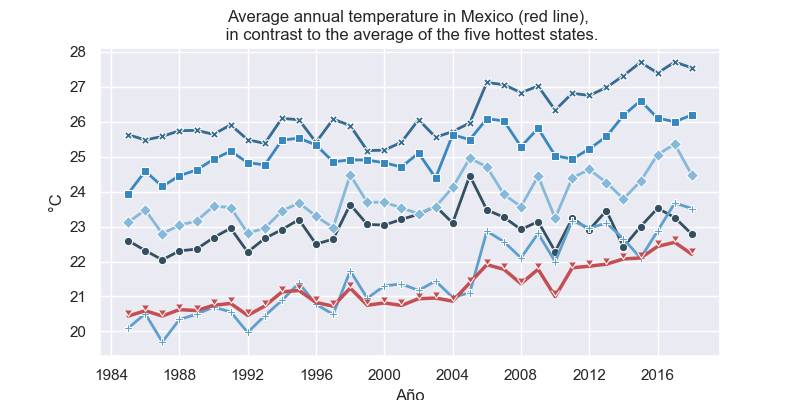

Text(0.5, 1.0, 'Average annual temperature in Mexico (red line), \n in contrast to the average of the five hottest states.')

In [5]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data = top5, palette = 'Blues_d',linewidth=2, dashes=False, markers = True, legend =  False)
sns.lineplot(data = frame['NACIONAL'], color = 'r', linewidth = 2.5, marker = 7)
plt.xlabel('Año')
plt.ylabel('°C')
plt.title('Average annual temperature in Mexico (red line), \n in contrast to the average of the five hottest states.')


In [6]:
date = datetime.date(1985,1,1)

In [7]:
locator =  mdates.YearLocator()
fmt = mdates.DateFormatter('%Y')

In [8]:
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)

In [9]:
ax.xaxis.set_tick_params(rotation=45)

In [10]:
ax.set_xlim(date,)

(724642.0, 737297.65)

In [11]:
for line, name in zip(ax.lines, top5.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name.title(), xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

In [12]:
plt.tight_layout()

In [242]:
plt.savefig('final proyect.png')